# EDA correlations between spectral features and chi-square results

In [30]:
import numpy as np
import pandas as pd

from readers_preprocess import read_filter
from time_to_freq_domain import eval_psd_not_modulated

from transformers import flatten_data
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
%matplotlib notebook


In [22]:
all_paths = [['data_bci\\row_data\\subject1\\'], ['data_bci\\row_data\\subject2\\'],['data_bci\\row_data\\subject3\\']]
keep_columns = ['F4', 'F3', 'AF4', 'AF3', 'class']
columns_to_read =  ['Fp1', 'AF3' ,'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5',
                   'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6',
                   'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz','class']

test_subject = '03'
freq = 512
train_subjects = ['01', '02']

min_freq = 8



num_perseg = 128
num_overlap = 64
freq=512
min_freq = 8
max_freq = 45

report_move_vs_word_corrs = []
report_left_vs_right_corrs = []
report_move_vs_word_pvals = []
report_left_vs_right_pvals = []
chanels_rank =  [25,  4,  9, 26, 30, 11,  7]


for path in all_paths:
    cutoff_beggining = 0
    seq_len = 0
    cut_step = 0
    train_data, _, train_anots, test_data, _, test_annoations = read_filter(path, train_subjects, test_subject, columns_to_read, cutoff_beggining, seq_len, cut_step)
    seq_len = freq
    cut_step = int(seq_len/2)
    window_train_data, _, window_train_anots, window_test_data, _, window_test_annoations = read_filter(path, train_subjects, test_subject, columns_to_read, cutoff_beggining, seq_len, cut_step)
   

    y_train = train_anots
    y_train_move_word = (y_train == 2)
    y_train_left_right = y_train[y_train!=2]

    
    
    X_train =  eval_psd_not_modulated(train_data, num_perseg, num_overlap, freq, min_freq, max_freq)
        
    X_train = flatten_data(X_train[:,:,chanels_rank])

    X_train_move_word = X_train
    X_train_left_right = X_train[y_train != 2]
    

    
    max_el = X_train_move_word.max() 
    min_el = X_train_move_word.min()

    X_train_move_word = (X_train_move_word-min_el)/(max_el-min_el)
    
    
    max_el = X_train_left_right.max() 
    min_el = X_train_left_right.min()    
    X_train_left_right = (X_train_left_right-min_el)/(max_el-min_el)
    
    corrs_move_word = np.corrcoef(X_train_move_word.T)
    _, pi_valas_move_word = chi2(X_train_move_word, y_train_move_word)
    
    report_move_vs_word_corrs.append(corrs_move_word)
    report_move_vs_word_pvals.append(pi_valas_move_word)

    
    corrs_left_right = np.corrcoef(X_train_left_right.T)
    _, pi_valas_left_right = chi2(X_train_left_right, y_train_left_right)
    
    report_left_vs_right_corrs.append(corrs_left_right)
    report_left_vs_right_pvals.append(pi_valas_left_right)
    
report_move_vs_word_corrs = np.array(report_move_vs_word_corrs).flatten()
report_left_vs_right_corrs = np.array(report_left_vs_right_corrs).flatten()
report_move_vs_word_pvals = np.array(report_move_vs_word_pvals).flatten()
report_left_vs_right_pvals = np.array(report_left_vs_right_pvals).flatten()

<IPython.core.display.Javascript object>


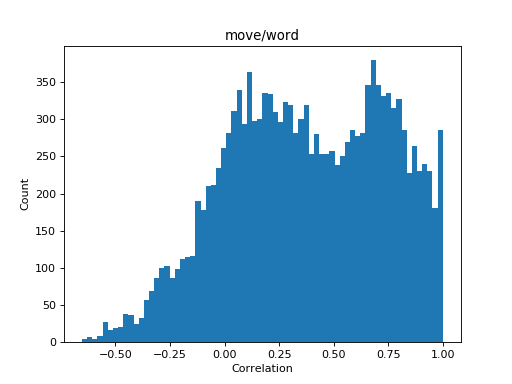

Text(0.5,1,'move/word')

In [37]:
plt.hist(report_move_vs_word_corrs,bins=70)
plt.xlabel('Correlation')
plt.ylabel('Count')
plt.title('move/word')

<IPython.core.display.Javascript object>


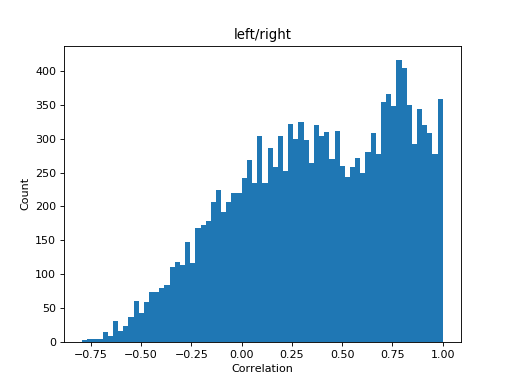

Text(0.5,1,'left/right')

In [38]:
plt.hist(report_left_vs_right_corrs,bins=70)
plt.xlabel('Correlation')
plt.ylabel('Count')
plt.title('left/right')

<IPython.core.display.Javascript object>


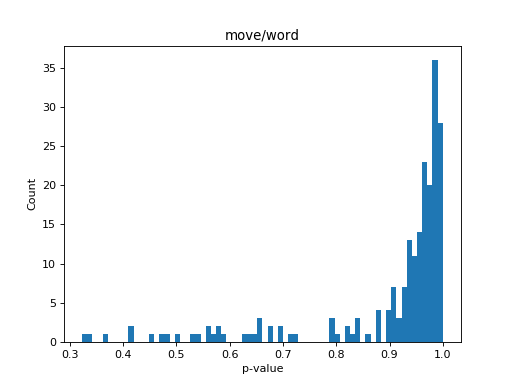

Text(0.5,1,'move/word')

In [40]:
plt.hist(report_move_vs_word_pvals,bins=70)
plt.xlabel('p-value')
plt.ylabel('Count')
plt.title('move/word')

<IPython.core.display.Javascript object>


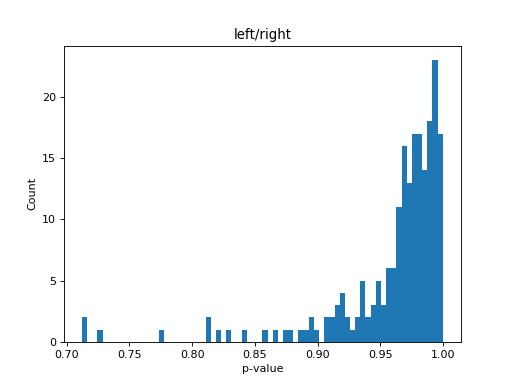

Text(0.5,1,'left/right')

In [41]:
plt.hist(report_left_vs_right_pvals,bins=70)
plt.xlabel('p-value')
plt.ylabel('Count')
plt.title('left/right')